# MOW 323 - Simulation-based design 

# Beam Elements - Static analysis

The purpose of this jupyter notebook is to introduce you to beam elements in engmod. 

The beam elements used in this code have the following properties: 

- Two nodes
- Each node has three-degrees-of-freedom
  * Axial displacement/Load 
  * Transverse displacement/Load 
  * Angular displacement(rotation)/Moment
This means that each element has six degrees-of-freedom. 

In [1]:
import importlib; 
try:
    import engmod.structfem as sfem; importlib.reload(sfem)
except:
    try:
        import add_engmod
        import engmod.structfem as sfem; importlib.reload(sfem)    
        print("EngMod Development Mode Activated. Not applicable/relevant to students.")        
    except Exception as e:
        print(e)
        print("Engmod is not located in the correct folder. ")

import numpy as np 
import matplotlib.pyplot as plt 

Added module.
EngMod Development Mode Activated. Not applicable/relevant to students.


In [2]:
sfem.__version__

'2021-10-07'

# Beam example 1

In [3]:
# The total length of the beam. 
L_beam = 1 
# The Young's modulus in Pa
E = 200E9
# The height of the beam in metres
h = 30/1E3
# The width of the beam in metres
b = 10/1E3
# The area moment of inertia:
I = 1/12 * b * h**3
# The cross-sectional area
A = h * b
# The density (only important for dynamic analyses)
rho = 7800
# The force applied to the structure. 
F = 1000

# Sanity checks

The displacement of a simply supported can be calculated with the following equation

$$
\delta = \frac{F \cdot L^3}{48 \cdot E \cdot I}
$$

The force is applied at the centre in the upward direction

In [4]:
F * L_beam**3 / (48 * E * I) * 1000," in mm"

(4.629629629629631, ' in mm')

The bending moment in a simply supported beam with a force applied to the centre is given by
$$
M = -\frac{F \cdot L}{4} 
$$
for an upward force of $F$ applied to the edge of the beam.

In [5]:
M_max = -F * L_beam/2 /2

M_max

-250.0

# Finite element calculation

```python


# In this beam we have three nodes
nodecoor = np.array([
                     [0,0],        # Node 0
                     [L_beam/2,0], # Node 1
                     [L_beam,0]])  # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 2, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,0,0]))
# Prescribed displacement applied to Node 2, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,1,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

"""
This is an equivalent method to define the prescribed displacements

prescribed_displacement = np.array([
                                    [0,0,0], # Node 0, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 0, in the 1 direction (y-direcion) with a displacement of 0
                                    [2,0,0], # Node 2, in the 0 direction (x-direcion) with a displacement of 0
                                    [2,1,0]  # Node 2, in the 1 direction (y-direcion) with a displacement of 0
                                   ])
"""

# Initialise the prescribed force as an empty list:
prescribed_forces = []
# Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
prescribed_forces.append(np.array([1,1,F]))
# Convert the prescribed force list to an array:
prescribed_forces = np.array(prescribed_forces)

"""
This is an equivalent method to define the prescribed forces

prescribed_forces = np.array([
                              [1,1,F], # Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
                             ])
"""

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties


```


In [6]:

# In this beam we have three nodes
nodecoor = np.array([
                     [0,0],        # Node 0
                     [L_beam/2,0], # Node 1
                     [L_beam,0]])  # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 2, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,0,0]))
# Prescribed displacement applied to Node 2, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,1,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

"""
This is an equivalent method to define the prescribed displacements

prescribed_displacement = np.array([
                                    [0,0,0], # Node 0, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 0, in the 1 direction (y-direcion) with a displacement of 0
                                    [2,0,0], # Node 2, in the 0 direction (x-direcion) with a displacement of 0
                                    [2,1,0]  # Node 2, in the 1 direction (y-direcion) with a displacement of 0
                                   ])
"""

# Initialise the prescribed force as an empty list:
prescribed_forces = []
# Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
prescribed_forces.append(np.array([1,1,abs(F)]))
# Convert the prescribed force list to an array:
prescribed_forces = np.array(prescribed_forces)

"""
This is an equivalent method to define the prescribed forces

prescribed_forces = np.array([
                              [1,1,F], # Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
                             ])
"""

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties


Plot the system

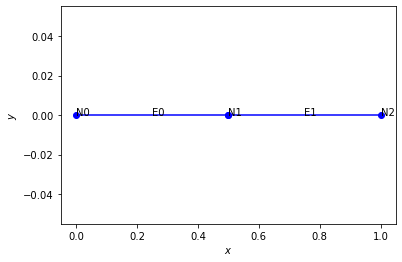

In [7]:
fmn.plot_system()

Solve the system of equations 
$$
[K]\{u\} = \{f\}
$$

In [8]:
solution_dict = fmn.solve()

solution_dict

{'displacements': array([ 0.00000000e+00,  0.00000000e+00,  1.38888889e-02,  0.00000000e+00,
         4.62962963e-03, -1.03762163e-19,  0.00000000e+00,  0.00000000e+00,
        -1.38888889e-02]),
 'loads': array([   0., -500.,    0.,    0., 1000.,    0.,    0., -500.,    0.])}

The displacement data in the solution dictionary:

In [9]:
solution_dict["displacements"]

array([ 0.00000000e+00,  0.00000000e+00,  1.38888889e-02,  0.00000000e+00,
        4.62962963e-03, -1.03762163e-19,  0.00000000e+00,  0.00000000e+00,
       -1.38888889e-02])

The displacement loads in the solution dictionary:

In [10]:
solution_dict["loads"]

array([   0., -500.,    0.,    0., 1000.,    0.,    0., -500.,    0.])

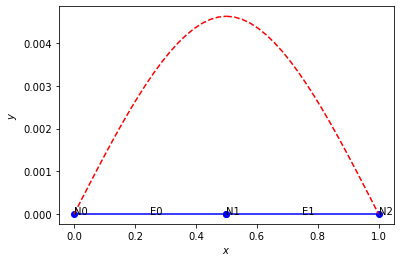

In [11]:
fmn.plot_system(show_displacement=True)

Plot the solution at the nodes and the elements

<span style="color: #ff0000">Warning: The bending moments are not incorporated in the solution</span> 

In [12]:
fmn.post_print_solution()

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: 0.013889, F_x: 0.000000, F_y: -500.000000, M_z: 0.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 4.629630 x 10^-3, angle: -0.000000, F_x: 0.000000, F_y: 1000.000000, M_z: 0.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: -0.013889, F_x: 0.000000, F_y: -500.000000, M_z: 0.000000

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************

                     Element 0                     
Normal stress due to axial load (only): 0.000000 x 10^6
                     Element 1                     
Normal stress due to axial load (only): 0.000000 x 10^6

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************


Plot the bending moment solution. 

Minimum bending moment: -250.00000000000003
Maximum bending moment: 0.0


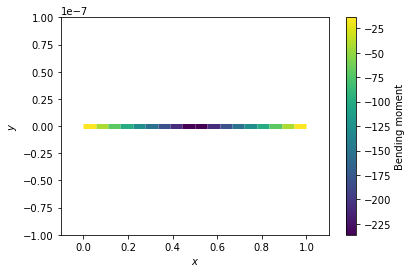

In [13]:
fmn.post_plot_bending_moment()

We can calculate the bending stress using the bending moment by supplying a function: 

$$
\sigma_{xx} = \frac{M \cdot y}{I} = M \cdot \frac{y}{I} 
$$

<span style="color: #ff0000">Unfortunately, we can only calculate stresses in the form:
$$
\sigma_{xx} = M \cdot \text{const}
$$
</span> 

Minimum bending moment: -250.00000000000003
Maximum bending moment: 0.0
Minimum TRANSFORMED bending moment: -166.6666666666667
Maximum TRANSFORMED bending moment: 0.0


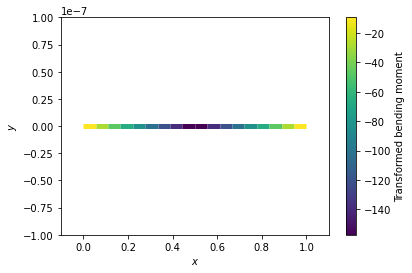

In [14]:
constant = h/2/I/1E6

function = lambda M: M*constant # Stress in MPa

fmn.post_plot_bending_moment(function=function)

Displacement at a node

In [15]:
fmn.post_get_displacement(1,1) * 1000

4.6296296296296315

Force applied to a node

In [16]:
fmn.post_get_force(1,1) 

1000.0

Stress in an element (without including the bending moments. Be careful with the interpretation)

In [17]:
fmn.post_get_stress(1) 

0.0

Bending moment variation over a profile

Text(0.5, 0, 'Location on the x-axis')

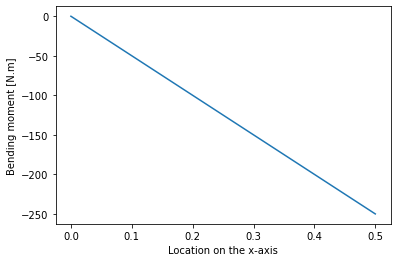

In [18]:
dict_moment = fmn.post_get_bending_moment(0,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"])
plt.ylabel("Bending moment [N.m]")
plt.xlabel("Location on the x-axis")

Plotting the bending moment over the whole beam:

Text(0.5, 0, 'Location on the x-axis')

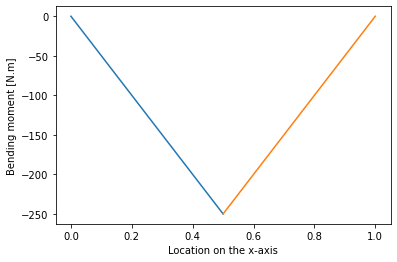

In [19]:
dict_moment = fmn.post_get_bending_moment(0,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"])
plt.ylabel("Bending moment [N.m]")
plt.xlabel("Location on the x-axis")

dict_moment = fmn.post_get_bending_moment(1,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"])
plt.ylabel("Bending moment [N.m]")
plt.xlabel("Location on the x-axis")

Plotting the bending stress over the whole beam

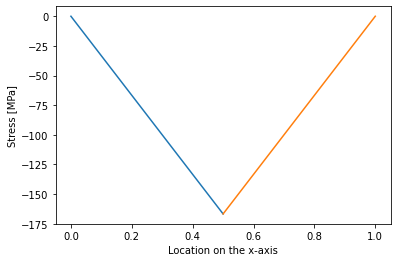

In [20]:
dict_moment = fmn.post_get_bending_moment(0,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"] * constant)
plt.ylabel("Stress [MPa]")
plt.xlabel("Location on the x-axis")

dict_moment = fmn.post_get_bending_moment(1,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"] * constant)

Safety factor plot for a yield strength of 250 MPa.

Assume that there are only bending stresses, the Von-Mises stress is equal to $|\sigma_{xx}|$ and therefore the safety factor is equal to
$$
\text{Safety factor} = \frac{250}{|\sigma_{xx}|}
$$

Safety factor of  2


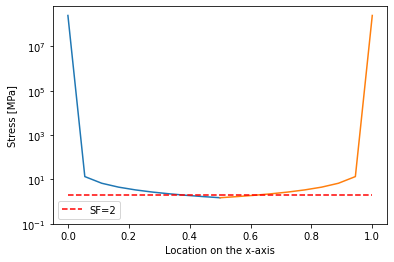

In [21]:
dict_moment = fmn.post_get_bending_moment(0,npoints=10)

SF = 2

print("Safety factor of ",SF)

plt.figure(1)
plt.semilogy(dict_moment["x_coor"],250/abs(dict_moment["moment"] * constant+1E-6))
plt.ylabel("Stress [MPa]")
plt.xlabel("Location on the x-axis")
plt.semilogy(dict_moment["x_coor"],SF * np.ones_like(dict_moment["x_coor"]),'r--')

dict_moment = fmn.post_get_bending_moment(1,npoints=10)

plt.figure(1)
plt.semilogy(dict_moment["x_coor"],250/abs(dict_moment["moment"] * constant+1E-6))
plt.semilogy(dict_moment["x_coor"],SF * np.ones_like(dict_moment["x_coor"]),'r--',label="SF={}".format(SF))
plt.ylim([10**-1,None])
plt.legend()

# Beam example 2 - Two elements

Double cantilever beam with three nodes

In [22]:

# In this beam we have three nodes
nodecoor = np.array([
                     [0,0],        # Node 0
                     [L_beam/2,0], # Node 1
                     [L_beam,0]])  # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 0, in the 2 direction (angle-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,2,0]))
# Prescribed displacement applied to Node 2, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,0,0]))
# Prescribed displacement applied to Node 2, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,1,0]))
# Prescribed displacement applied to Node 2, in the 2 direction (angle-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,2,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

"""
This is an equivalent method to define the prescribed displacements

prescribed_displacement = np.array([
                                    [0,0,0], # Node 0, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 0, in the 1 direction (y-direcion) with a displacement of 0
                                    [2,0,0], # Node 2, in the 0 direction (x-direcion) with a displacement of 0
                                    [2,1,0]  # Node 2, in the 1 direction (y-direcion) with a displacement of 0
                                   ])
"""

# Initialise the prescribed force as an empty list:
prescribed_forces = []
# Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
prescribed_forces.append(np.array([1,1,abs(F)]))
# Convert the prescribed force list to an array:
prescribed_forces = np.array(prescribed_forces)

"""
This is an equivalent method to define the prescribed forces

prescribed_forces = np.array([
                              [1,1,F], # Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
                             ])
"""

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties


Plot the system

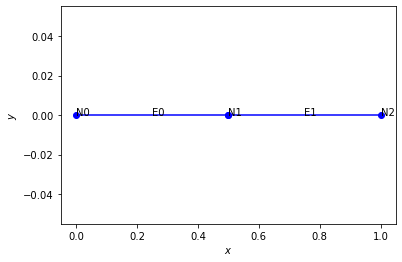

In [23]:
fmn.plot_system()

Solve the system of equations 
$$
[K]\{u\} = \{f\}
$$

In [24]:
solution_dict = fmn.solve()

solution_dict

{'displacements': array([0.        , 0.        , 0.        , 0.        , 0.00115741,
        0.        , 0.        , 0.        , 0.        ]),
 'loads': array([   0., -500., -125.,    0., 1000.,    0.,    0., -500.,  125.])}

The displacement data in the solution dictionary:

In [25]:
solution_dict["displacements"]

array([0.        , 0.        , 0.        , 0.        , 0.00115741,
       0.        , 0.        , 0.        , 0.        ])

The displacement loads in the solution dictionary:

In [26]:
solution_dict["loads"]

array([   0., -500., -125.,    0., 1000.,    0.,    0., -500.,  125.])

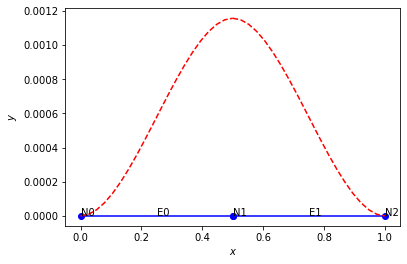

In [27]:
fmn.plot_system(show_displacement=True)

Plot the solution at the nodes and the elements

<span style="color: #ff0000">Warning: The bending moments are not incorporated in the solution</span> 

In [28]:
fmn.post_print_solution()

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: 0.000000, F_x: 0.000000, F_y: -500.000000, M_z: -125.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 1.157407 x 10^-3, angle: 0.000000, F_x: 0.000000, F_y: 1000.000000, M_z: 0.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: 0.000000, F_x: 0.000000, F_y: -500.000000, M_z: 125.000000

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************

                     Element 0                     
Normal stress due to axial load (only): 0.000000 x 10^6
                     Element 1                     
Normal stress due to axial load (only): 0.000000 x 10^6

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************


Plot the bending moment solution. 

Minimum bending moment: -125.00000000000001
Maximum bending moment: 125.00000000000001


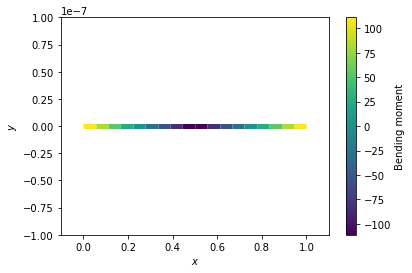

In [29]:
fmn.post_plot_bending_moment()

We can calculate the bending stress using the bending moment by supplying a function: 

$$
\sigma_{xx} = \frac{M \cdot y}{I} = M \cdot \frac{y}{I} 
$$

<span style="color: #ff0000">Unfortunately, we can only calculate stresses in the form:
$$
\sigma_{xx} = M \cdot \text{const}
$$
</span> 

Minimum bending moment: -125.00000000000001
Maximum bending moment: 125.00000000000001
Minimum TRANSFORMED bending moment: -83.33333333333336
Maximum TRANSFORMED bending moment: 83.33333333333336


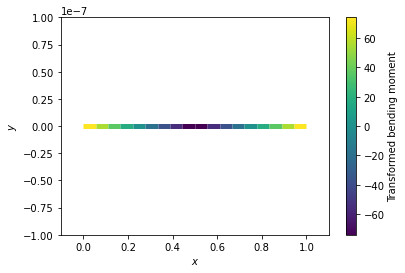

In [30]:
constant = h/2/I/1E6

function = lambda M: M*constant # Stress in MPa

fmn.post_plot_bending_moment(function=function)

Displacement at a node

In [31]:
fmn.post_get_displacement(1,1) * 1000

1.1574074074074079

Force applied to a node

In [32]:
fmn.post_get_force(1,1) 

1000.0

Stress in an element (without including the bending moments. Be careful with the interpretation)

In [33]:
fmn.post_get_stress(1) 

0.0

Bending moment variation over a profile

Text(0.5, 0, 'Location on the x-axis')

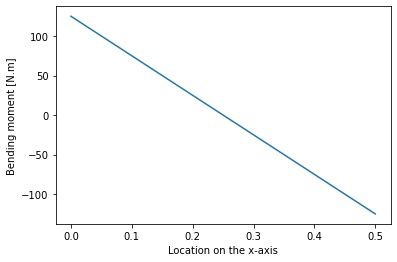

In [34]:
dict_moment = fmn.post_get_bending_moment(0,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"])
plt.ylabel("Bending moment [N.m]")
plt.xlabel("Location on the x-axis")

Plotting the bending moment over the whole beam:

Text(0.5, 0, 'Location on the x-axis')

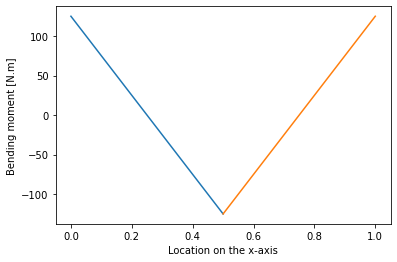

In [35]:
dict_moment = fmn.post_get_bending_moment(0,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"])
plt.ylabel("Bending moment [N.m]")
plt.xlabel("Location on the x-axis")

dict_moment = fmn.post_get_bending_moment(1,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"])
plt.ylabel("Bending moment [N.m]")
plt.xlabel("Location on the x-axis")

Plotting the bending stress over the whole beam

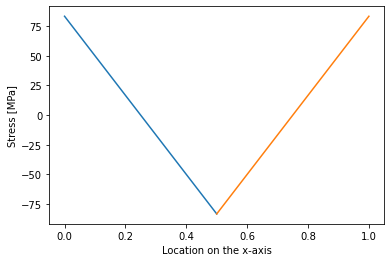

In [36]:
dict_moment = fmn.post_get_bending_moment(0,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"] * constant)
plt.ylabel("Stress [MPa]")
plt.xlabel("Location on the x-axis")

dict_moment = fmn.post_get_bending_moment(1,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"] * constant)

Safety factor plot for a yield strength of 250 MPa.

Assume that there are only bending stresses, the Von-Mises stress is equal to $|\sigma_{xx}|$ and therefore the safety factor is equal to
$$
\text{Safety factor} = \frac{250}{|\sigma_{xx}|}
$$

Safety factor of  2


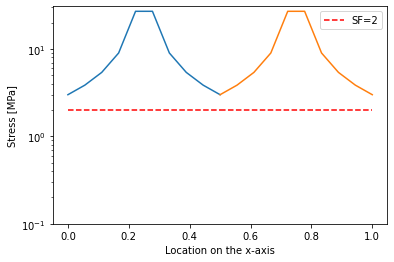

In [37]:
dict_moment = fmn.post_get_bending_moment(0,npoints=10)

SF = 2

print("Safety factor of ",SF)

plt.figure(1)
plt.semilogy(dict_moment["x_coor"],250/abs(dict_moment["moment"] * constant+1E-6))
plt.ylabel("Stress [MPa]")
plt.xlabel("Location on the x-axis")
plt.semilogy(dict_moment["x_coor"],SF * np.ones_like(dict_moment["x_coor"]),'r--')

dict_moment = fmn.post_get_bending_moment(1,npoints=10)

plt.figure(1)
plt.semilogy(dict_moment["x_coor"],250/abs(dict_moment["moment"] * constant+1E-6))
plt.semilogy(dict_moment["x_coor"],SF * np.ones_like(dict_moment["x_coor"]),'r--',label="SF={}".format(SF))
plt.ylim([10**-1,None])
plt.legend()

# Beam example 2 - Many elements

Double cantilever beam with many nodes

Prescribed displacement
 [[ 0  0  0]
 [ 0  1  0]
 [ 0  2  0]
 [99  0  0]
 [99  1  0]
 [99  2  0]]
Prescribed forces
 [[  49    1 1000]]


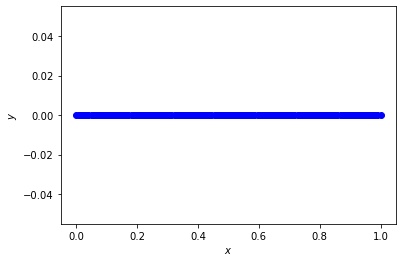

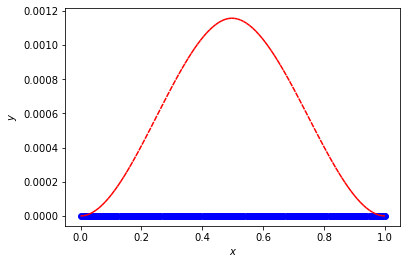

In [38]:
nnodes = 100

# ------------------------------------------------------------------------------
# Create the nodal coordinates:
nodecoor = np.zeros([nnodes,2])

nodecoor[:,0] = np.linspace(0,1,nodecoor.shape[0])*L_beam
nodecoor[:,1] = 0

# ------------------------------------------------------------------------------
# Create the element connectivity:
elemconn = np.zeros([nodecoor.shape[0]-1,2])
elemconn[:,0] = np.arange(elemconn.shape[0])
elemconn[:,1] = elemconn[:,0] + 1
elemconn = np.array(elemconn).astype(int)
# ------------------------------------------------------------------------------
# Create the prescribed displacements.
prescribed_displacement = []
prescribed_displacement.append(np.array([0,0,0]))
prescribed_displacement.append(np.array([0,1,0]))
prescribed_displacement.append(np.array([0,2,0]))
prescribed_displacement.append(np.array([nnodes-1,0,0]))
prescribed_displacement.append(np.array([nnodes-1,1,0]))
prescribed_displacement.append(np.array([nnodes-1,2,0]))

prescribed_displacement = np.array(prescribed_displacement)
print("Prescribed displacement\n",prescribed_displacement)
# ------------------------------------------------------------------------------
# Create the prescribed forces:
prescribed_forces = []
prescribed_forces.append(np.array([int((nnodes-1)/2),1,F]))
prescribed_forces = np.array(prescribed_forces)
print("Prescribed forces\n",prescribed_forces)
# ------------------------------------------------------------------------------

elemprop = {}#np.ones([elemconn.shape[0],3]) * np.array([E,I,A])
elemprop["E"] = np.ones(elemconn.shape[0]) * E
elemprop["I"] = np.ones(elemconn.shape[0]) * I
elemprop["A"] = np.ones(elemconn.shape[0]) * A
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_forces,elemprop)


fmn.solve()

fmn.plot_system(show_element_numbers=False,show_node_numbers=False)

fmn.plot_system(show_displacement=True,show_element_numbers=False,show_node_numbers=False)

#fmn.post_print_solution()


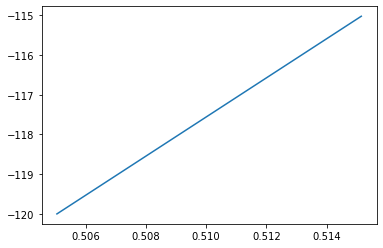

In [39]:
dict_moment = fmn.post_get_bending_moment(50,npoints=10)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"])

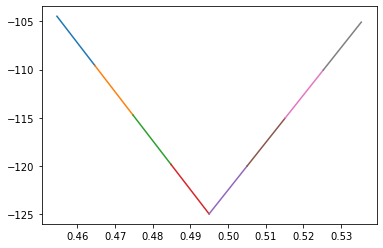

In [40]:
for i in range(45,53):

    dict_moment = fmn.post_get_bending_moment(i,npoints=10)

    plt.figure(1)
    plt.plot(dict_moment["x_coor"],dict_moment["moment"])

This might take a few seconds to calculate - not a good idea to do it like this.


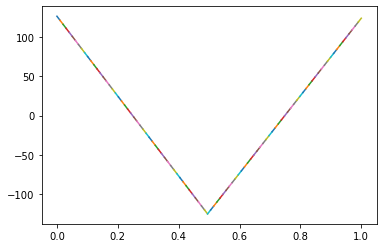

In [41]:
print("This might take a few seconds to calculate - not a good idea to do it like this.")
for i in range(0,elemconn.shape[0]):

    dict_moment = fmn.post_get_bending_moment(i,npoints=10)

    plt.figure(1)
    plt.plot(dict_moment["x_coor"],dict_moment["moment"])

Minimum bending moment: -124.9744936912904
Maximum bending moment: 126.24974363586028


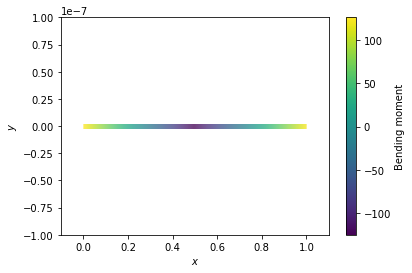

In [42]:
fmn.post_plot_bending_moment()

# Beam example 2 - Moment applied at the centre with the load
- The load is applied to Node 1 downwards. This is a negative force.
- The mometn is applied to Node 1 in the clockwise direction. This means it is negative. See slides for positive directions.


In [49]:

# In this beam we have three nodes
nodecoor = np.array([
                     [0,0],        # Node 0
                     [L_beam/2,0], # Node 1
                     [L_beam,0]])  # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 0, in the 2 direction (angle-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,2,0]))
# Prescribed displacement applied to Node 2, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,0,0]))
# Prescribed displacement applied to Node 2, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,1,0]))
# Prescribed displacement applied to Node 2, in the 2 direction (angle-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,2,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

"""
This is an equivalent method to define the prescribed displacements

prescribed_displacement = np.array([
                                    [0,0,0], # Node 0, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 0, in the 1 direction (y-direcion) with a displacement of 0
                                    [2,0,0], # Node 2, in the 0 direction (x-direcion) with a displacement of 0
                                    [2,1,0]  # Node 2, in the 1 direction (y-direcion) with a displacement of 0
                                   ])
"""

# Initialise the prescribed force as an empty list:
prescribed_forces = []
# Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
prescribed_forces.append(np.array([1,1,-(F)]))
# Prescribed moment applied to Node 1, in the 2 direction (rotation in the z-direcion) with a magnitude of 1000. The moment is applied clockwise.
prescribed_forces.append(np.array([1,2,-1000]))
# Convert the prescribed force list to an array:
prescribed_forces = np.array(prescribed_forces)

"""
This is an equivalent method to define the prescribed forces

prescribed_forces = np.array([
                              [1,1,F], # Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
                             ])
"""

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties


In [50]:
fmn.solve()

{'displacements': array([ 0.        ,  0.        ,  0.        ,  0.        , -0.00115741,
        -0.01388889,  0.        ,  0.        ,  0.        ]),
 'loads': array([    0., -1000.,  -125.,     0., -1000., -1000.,     0.,  2000.,
         -375.])}

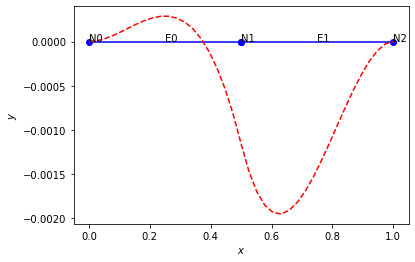

In [51]:
fmn.plot_system(show_displacement=True)